In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

In [2]:
train_data = pd.read_csv('train.csv')
predict_data = pd.read_csv('test.csv')

# Drop Id column
train_data.drop('Id', axis=1, inplace=True)
predict_data.drop('Id', axis=1, inplace=True)

In [3]:
train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

### Data Understanding and Visualization
For illustration, we will not visualize all the 79 attributes. We will visualize selected attributes to show different types of graphs that describe the information intuitively.

In [6]:
# For columns where there are NaN values, we will show # of NaNs and the percentage of NaN out of all records for each column

total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [7]:
# For columns where there are NaN values, we will show # of NaNs and the percentage of NaN out of all records for each column

total = predict_data.isnull().sum().sort_values(ascending=False)
percent = (predict_data.isnull().sum()/predict_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461


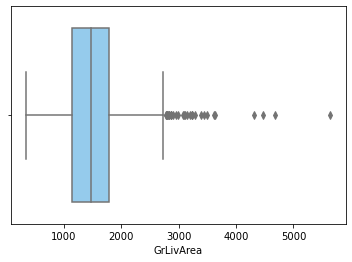

In [8]:
# Boxplot for one single numeric variable 'GrLivAre': Above grade (ground) living area square feet 

ax=sns.boxplot(train_data['GrLivArea'],color='lightskyblue')

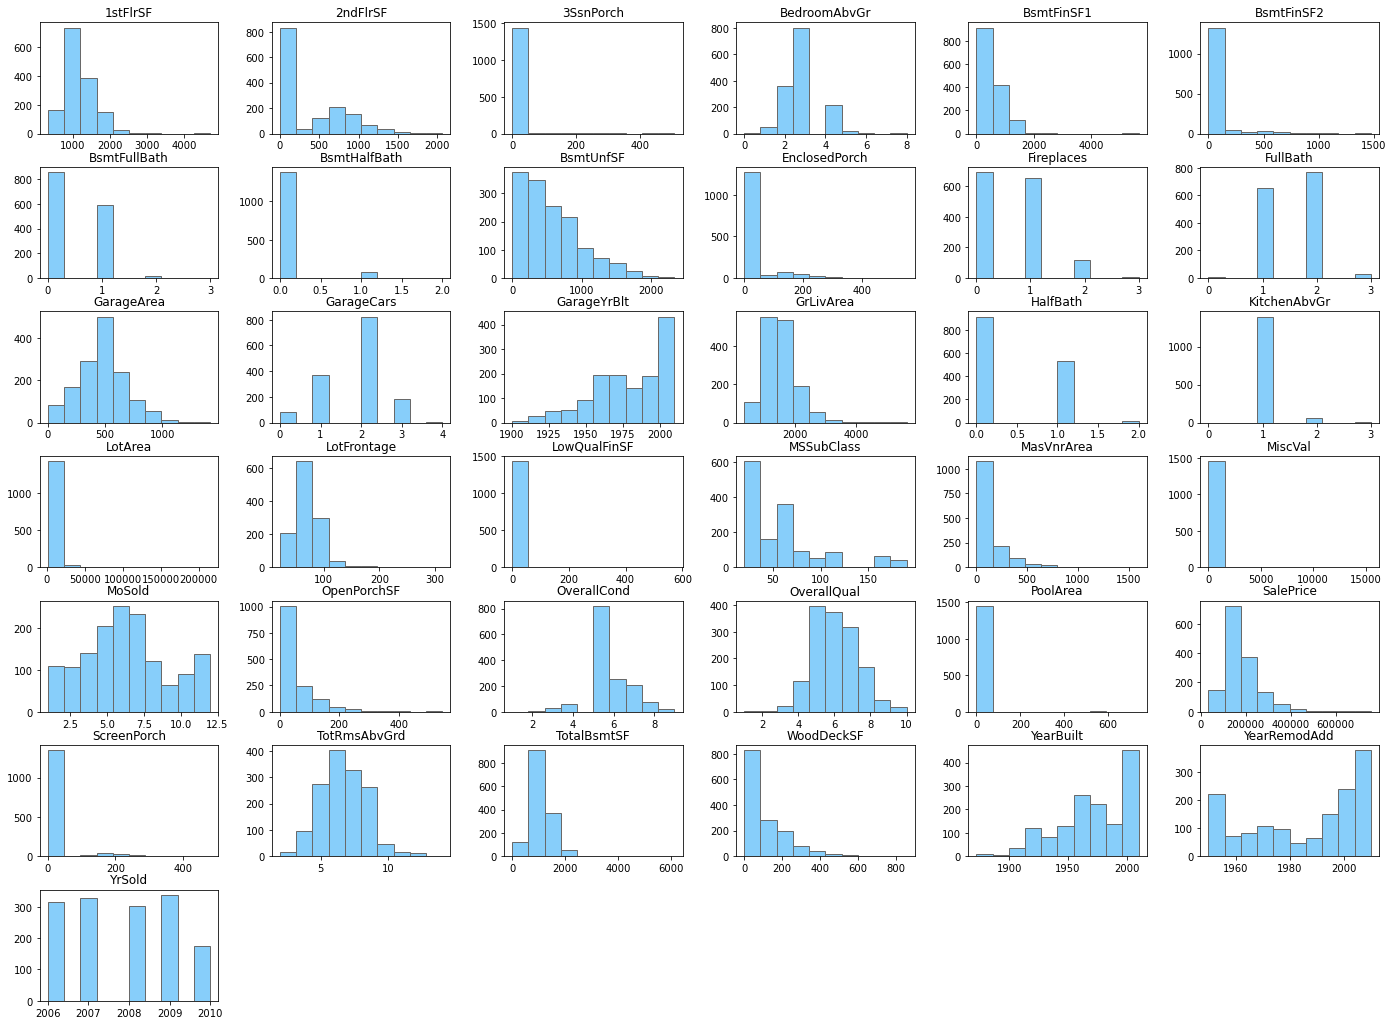

In [9]:
# Histogram charts for all numeric variables in the dataset

ax=train_data.hist(bins=10,figsize = (24,18),grid=False,edgecolor='dimgrey',color='lightskyblue')

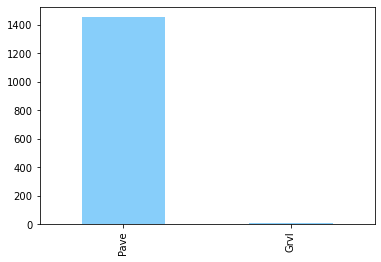

In [10]:
# Bar chart for a categorical variable 'Street': Type of road access to property (Grvl / Pave)

ax=train_data['Street'].value_counts().plot(kind='bar',color='lightskyblue')
# Normalis if needed: ax=data['Street'].value_counts(normalize=True).plot(kind='bar')

In [11]:
# Discritize / Binning 'OverallCond' (Overall condition rating) feature, group into 3 equal interval groups

group_names = ['Low rating','Middle rating','High rating']
train_data['OverallCond-binned']=pd.cut(train_data['OverallCond'], 3, labels=group_names)

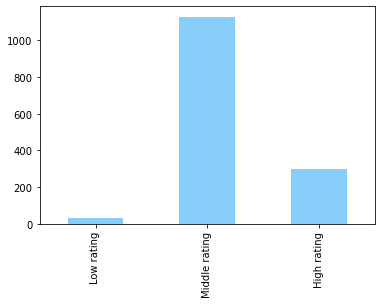

In [12]:
# Visualize the newly created variable ‘Age-binned’

train_data['OverallCond-binned'].value_counts(sort=False).plot(kind='bar',color='lightskyblue')

In [13]:
train_data.drop('OverallCond-binned', axis=1,inplace=True)

### Correlation Heatmap
A correlation Heatmap can be used to have a sense about which __numeric__ features are correlated to the target variable Saleprice. 

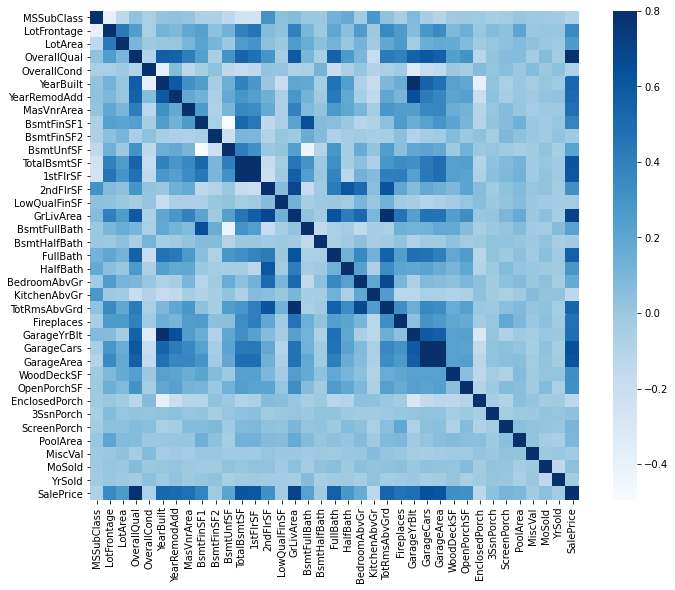

In [14]:
#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, cmap="Blues", square=True);

### Data Cleansing & Preprocessing
Deal with the NaN values in datasets

In [15]:
# Get all numeric columns (Except SalePrice as we don't want to preprocess target variable..)

numeric_columns = train_data.select_dtypes(include=np.number).columns.drop('SalePrice')

# Get all categorical columns
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns



In [16]:
# Step 1: Fill NaN values in categorical columns with 'None' where NaN values really means 
#             there are nothing but not missing data! Information comes from Kaggle page
meaningful_nan_columns = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
    'Fence', 'MiscFeature', 'MasVnrType'
]

for column in meaningful_nan_columns:
    train_data[column].fillna('None', inplace=True)
    predict_data[column].fillna('None', inplace=True)
    


In [17]:
# Step 2: For columns where NaN values are not clearly defined, we make use our creativity here

# Columns with NaN values in train_data

# GarageYrBlt column is NaN when there are no garage, we assign NaN with -1 values
train_data['GarageYrBlt'].fillna(-1, inplace=True)
predict_data['GarageYrBlt'].fillna(-1, inplace=True)

# All rows where MasVnrArea is NaN also has MasVnrType as None, mode value of MasVnrArea when MasVnrType is None is 0
train_data['MasVnrArea'].fillna(
    train_data[train_data.MasVnrType=='None']['MasVnrArea'].mode()[0], inplace=True
)
predict_data['MasVnrArea'].fillna(
    train_data[train_data.MasVnrType=='None']['MasVnrArea'].mode()[0], inplace=True
)

# Only one row with NaN value in Electrical Column, fill NaN values with 'Unknown' string
train_data['Electrical'].fillna('Unknown', inplace=True)
predict_data['Electrical'].fillna('Unknown', inplace=True)

# LotFrontage is 'Linear feet of street connected to property', we assume NaN values mean no street connected to property
train_data['LotFrontage'].fillna(0, inplace=True)
predict_data['LotFrontage'].fillna(0, inplace=True)



# Columns with NaN values in predict_data

# MsZoning is 'Identifies the general zoning classification of the sale.', fill NaN values with 'Unknown' string
train_data['MSZoning'].fillna('Unknown', inplace=True)
predict_data['MSZoning'].fillna('Unknown', inplace=True)

# Utilities is 'Type of utilities available', fill NaN values with 'Unknown' string
train_data['Utilities'].fillna('Unknown', inplace=True)
predict_data['Utilities'].fillna('Unknown', inplace=True)

# Exterior1st and Exterir2nd are 'Exterior materials covering on house', fill NaN values with 'Unknown' string
train_data['Exterior1st'].fillna('Unknown', inplace=True)
predict_data['Exterior1st'].fillna('Unknown', inplace=True)

train_data['Exterior2nd'].fillna('Unknown', inplace=True)
predict_data['Exterior2nd'].fillna('Unknown', inplace=True)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF is NaN when there is no basement
#     fill NaN values with 0 like other no basement rows
train_data['BsmtFinSF1'].fillna(0, inplace=True)
predict_data['BsmtFinSF1'].fillna(0, inplace=True)

train_data['BsmtFinSF2'].fillna(0, inplace=True)
predict_data['BsmtFinSF2'].fillna(0, inplace=True)

train_data['BsmtUnfSF'].fillna(0, inplace=True)
predict_data['BsmtUnfSF'].fillna(0, inplace=True)

train_data['TotalBsmtSF'].fillna(0, inplace=True)
predict_data['TotalBsmtSF'].fillna(0, inplace=True)

# Only one row with KitchenQual (Kitchen Quality) NaN values, the row has KitchenAbrGrade value of 1
#     We run value counts of KitchenQual where KitchenAbrGrade value==1, and 'TA' is the mode of these rows
#     Thus we fillNa with 'TA'
predict_data['KitchenQual'].fillna(
    train_data[train_data.KitchenAbvGr==1]['KitchenQual'].mode()[0], 
    inplace=True
)

# Two identical rows with NaN values for 'BsmtFullBath' and 'BsmtHalfBath', both rows have no basement
#     As a result, we fill in 0 values for number of bathrooms as other rows
train_data['BsmtFullBath'].fillna(0, inplace=True)
predict_data['BsmtFullBath'].fillna(0, inplace=True)

train_data['BsmtHalfBath'].fillna(0, inplace=True)
predict_data['BsmtHalfBath'].fillna(0, inplace=True)

# Functional is 'Functional: Home functionality (Assume typical unless deductions are warranted)'
#     As 'Typ' (Typical Functionality) is assumed by default, we fill NaN with 'Typ'
#     Noted that 'Typ' is also the mode value
train_data['Functional'].fillna(
    train_data['Functional'].mode()[0], inplace=True
)
predict_data['Functional'].fillna(
    train_data['Functional'].mode()[0], inplace=True
)

# There is one row with 'GarageCars' and 'GarageArea' with NaN values, the row has GarageType of 'Detached from home'
#     which means open parking. Fill in both columns with mode values of 2 and 576 of rows where GarageType is 'Detchd'
train_data['GarageCars'].fillna(
    train_data[train_data.GarageType=='Detchd']['GarageCars'].mode()[0], 
    inplace=True
)
predict_data['GarageCars'].fillna(
    train_data[train_data.GarageType=='Detchd']['GarageCars'].mode()[0], 
    inplace=True
)

train_data['GarageArea'].fillna(
    train_data[train_data.GarageType=='Detchd']['GarageArea'].mode()[0], 
    inplace=True
)
predict_data['GarageArea'].fillna(
    train_data[train_data.GarageType=='Detchd']['GarageArea'].mode()[0], 
    inplace=True
)

# One row has NaN value in SaleType, fill with 'WD' which is the mode value
train_data['SaleType'].fillna(
    train_data['SaleType'].mode()[0], inplace=True
)
predict_data['SaleType'].fillna(
    train_data['SaleType'].mode()[0], inplace=True
)

In [18]:
# Check if there are any more NaN values

columns_with_null_values_train = train_data.columns[train_data.isna().any()].tolist()
columns_with_null_values_predict = predict_data.columns[predict_data.isna().any()].tolist()
if (not columns_with_null_values_train) or (not columns_with_null_values_predict):
    print('Both train_data and predict_data have no more NaN values!') 
else:
    print('There are still some NaN values!')

Both train_data and predict_data have no more NaN values!


### Create Dummy Variables
Create Dummy variables on all categorical features using OneHotEncoder. We cannot use get_dummy method here because predicting data contains categorical values that are unseen in the trainig dataset. When we see new value, the handle_unknown='ignore' attribute of OneHotEncoder allows us to set all '0' in the dummy categories.

In [19]:
print(str(len(categorical_columns)) + " categorical features will be transformed into dummy variables!")

# Define OneHotEncoder instance
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')

# Fit the OneHotEncoder with categorical columns data of training data
enc.fit(train_data[categorical_columns])

# Transform the categorical columns of both training and predicting data with the fitted OneHotEncoder
train_dummy_variables = enc.transform(train_data[categorical_columns])
predict_dummy_variables = enc.transform(predict_data[categorical_columns])

# Create temp dummy variables dataframe
train_dummy_variables_df = pd.DataFrame(
    data=train_dummy_variables.toarray(), 
    columns=enc.get_feature_names(categorical_columns)
)
predict_dummy_variables_df = pd.DataFrame(
    data=predict_dummy_variables.toarray(), 
    columns=enc.get_feature_names(categorical_columns)
)

# Concat the training and predicting data, with original columns dropped, at axis=0 with dummy variables_df
train_data_dummied = pd.concat(
    objs=[
        train_data.drop(categorical_columns, axis=1), 
        train_dummy_variables_df
    ], axis=1
)
predict_data_dummied = pd.concat(
    objs=[
        predict_data.drop(categorical_columns, axis=1), 
        predict_dummy_variables_df
    ], axis=1
)

43 categorical features will be transformed into dummy variables!


In [20]:
# use the names of attributes to split them into independent variables X and target variable y ('Price')
X = train_data_dummied.drop('SalePrice', axis=1)
y = train_data_dummied['SalePrice']

In [21]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,Ga

### 1st Attempt of Feature Selection: using Correlation Heatmap
Based on the observation, we may perform feature selection to keep features above certain threshold and remove the columns whose correlations are below certain threshold away.

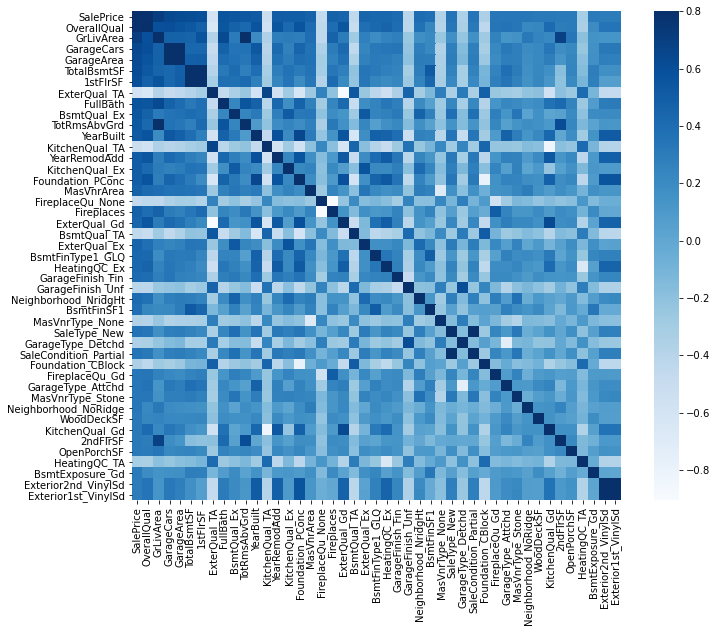

In [22]:
# new correlation matrix
corrmat = train_data_dummied.corr()

# keep features above certain threshold
# when threshold is 0.3, there will be 44 features selected
# by lowering the threshold, there will be more features selected; 
# while by choosing a higher threshold, there will be fewer features selected
threshold = 0.3
sorted_abs_corr = abs(corrmat['SalePrice']).sort_values(ascending=False)
numeric_features = sorted_abs_corr.index
selected_features_map = [numeric_features[index] for index, corr in enumerate(sorted_abs_corr)\
                     if corr > threshold]


# correlation matrix for features below threshold
cm = train_data_dummied[selected_features_map].corr()

#saleprice correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, vmax=.8, cmap="Blues", square=True);

selected_features_map = selected_features_map[1:len(selected_features_map)]

In [23]:
selected_features_map

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_TA',
 'FullBath',
 'BsmtQual_Ex',
 'TotRmsAbvGrd',
 'YearBuilt',
 'KitchenQual_TA',
 'YearRemodAdd',
 'KitchenQual_Ex',
 'Foundation_PConc',
 'MasVnrArea',
 'FireplaceQu_None',
 'Fireplaces',
 'ExterQual_Gd',
 'BsmtQual_TA',
 'ExterQual_Ex',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'GarageFinish_Fin',
 'GarageFinish_Unf',
 'Neighborhood_NridgHt',
 'BsmtFinSF1',
 'MasVnrType_None',
 'SaleType_New',
 'GarageType_Detchd',
 'SaleCondition_Partial',
 'Foundation_CBlock',
 'FireplaceQu_Gd',
 'GarageType_Attchd',
 'MasVnrType_Stone',
 'Neighborhood_NoRidge',
 'WoodDeckSF',
 'KitchenQual_Gd',
 '2ndFlrSF',
 'OpenPorchSF',
 'HeatingQC_TA',
 'BsmtExposure_Gd',
 'Exterior2nd_VinylSd',
 'Exterior1st_VinylSd']

In [24]:
len(selected_features_map)

44

### 2nd Attempt of Feature Selection using Lasso Regression
As learnt during lecture 3, a very rough rule of thumb is to have n>10m, where n is #records, m is #attributes. After data cleansing and dummy variable creation. There are 303 features for 1460 rows of training data. It is advised to keep the number of features under 146. We use Lasso Regression for feature selection. After trial and error, Lasso Regression with alpha=1080 selects the best 40 features. 

In [25]:
X.shape

(1460, 303)

In [26]:
lasso = Lasso(alpha = 1080, max_iter=100000).fit(X, y)
model = SelectFromModel(lasso, prefit=True)
feature_indexes = model.get_support()
selected_features = X.columns[feature_indexes]

In [27]:
selected_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'Neighborhood_NridgHt', 'Condition1_Norm',
       'MasVnrType_BrkFace', 'ExterQual_TA', 'BsmtQual_Ex', 'BsmtExposure_Gd',
       'BsmtExposure_No', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'KitchenQual_Ex',
       'KitchenQual_TA'],
      dtype='object')

In [28]:
len(selected_features)

41

### 1st Round Model Building & Normalization
### Here we use the 44 selected features in our 1st attemp of feature selection

In this 1st round of model building, we employ simplest measures as assignment 2. 

In [29]:
# Randomly split the data into training dataset (70%) and testing dataset (30%) 
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_map], y, test_size=0.3, random_state = 0)

In [30]:
features = selected_features_map

zscore_scaler = preprocessing.StandardScaler().fit(X_train[features])
X_train[features]=zscore_scaler.transform(X_train[features])
X_test[features]=zscore_scaler.transform(X_test[features])


In [31]:
X_train.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,BsmtQual_Ex,TotRmsAbvGrd,YearBuilt,KitchenQual_TA,YearRemodAdd,KitchenQual_Ex,Foundation_PConc,MasVnrArea,FireplaceQu_None,Fireplaces,ExterQual_Gd,BsmtQual_TA,ExterQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,GarageFinish_Fin,GarageFinish_Unf,Neighborhood_NridgHt,BsmtFinSF1,MasVnrType_None,SaleType_New,GarageType_Detchd,SaleCondition_Partial,Foundation_CBlock,FireplaceQu_Gd,GarageType_Attchd,MasVnrType_Stone,Neighborhood_NoRidge,WoodDeckSF,KitchenQual_Gd,2ndFlrSF,OpenPorchSF,HeatingQC_TA,BsmtExposure_Gd,Exterior2nd_VinylSd,Exterior1st_VinylSd
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03
mean,-3.795616e-16,-9.016488e-17,-8.799224e-17,4.073715e-20,2.666925e-17,1.314045e-16,2.198720e-16,-1.188438e-16,-1.880427e-16,-1.760931e-16,1.312605e-15,1.464365e-16,-3.205742e-15,-7.778079e-17,1.134122e-16,3.012919e-16,-1.390495e-17,-2.959146e-16,4.823278e-17,-6.517943e-18,-3.876547e-16,1.179748e-16,4.762444e-16,-2.607177e-16,3.454510e-17,-1.466537e-16,5.431619e-17,-2.389913e-16,2.159612e-16,-5.561978e-17,-2.019476e-16,1.105878e-16,1.090669e-16,-6.433210e-16,-1.320970e-16,-3.650048e-16,-6.398448e-17,-6.083414e-17,-1.412221e-17,-1.056993e-16,-4.664675e-16,7.886712e-17,-1.160194e-16,-1.212337e-16
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00
min,-3.742388e+00,-2.295666e+00,-2.404485e+00,-2.249062e+00,-2.573791e+00,-2.214326e+00,-1.294370e+00,-2.911640e+00,-2.953541e-01,-2.816963e+00,-3.273185e+00,-1.025772e+00,-1.692964e+00,-2.669809e-01,-8.904956e-01,-5.686169e-01,-9.373774e-01,-9.640632e-01,-7.060692e-01,-9.100905e-01,-1.739021e-01,-6.294242e-01,-9.863939e-01,-5.645438e-01,-8.302145e-01,-2.291793e-01,-1.029109e+00,-1.226744e+00,-2.914201e-01,-5.976937e-01,-2.953541e-01,-8.712268e-01,-5.765970e-01,-1.216792e+00,-3.238284e-01,-1.739021e-01,-7.391029e-01,-8.035749e-01,-8.050546e-01,-7.009105e-01,-6.567896e-01,-3.107515e-01,-7.263974e-01,-7.437684e-01
25%,-7.951944e-01,-7.378664e-01,-1.041544e+00,-6.954593e-01,-6.129810e-01,-7.429636e-01,-1.294370e+00,-1.064529e+00,-2.953541e-01,-9.591852e-01,-5.604265e-01,-1.025772e+00,-8.635251e-01,-2.669809e-01,-8.904956e-01,-5.686169e-01,-9.373774e-01,-9.640632e-01,-7.060692e-01,-9.100905e-01,-1.739021e-01,-6.294242e-01,-9.863939e-01,-5.645438e-01,-8.302145e-01,-2.291793e-01,-1.029109e+00,-1.226744e+00,-2.914201e-01,-5.976937e-01,-2.953541e-01,-8.712268e-01,-5.765970e-01,-1.216792e+00,-3.238284e-01,-1.739021e-01,-7.391029e-01,-8.035749e-01,-8.050546e-01,-7.009105e-01,-6.567896e-01,-3.107515e-01,-7.263974e-01,-7.437684e-01
50%,-5.839596e-02,-8.334920e-02,3.213982e-01,3.642287e-02,-1.544831e-01,-1.784953e-01,7.725769e-01,7.825822e-01,-2.953541e-01,-3.399260e-01,3.505701e-02,9.748752e-01,4.050280e-01,-2.669809e-01,-8.904956e-01,-5.686169e-01,-9.373774e-01,6.098547e-01,-7.060692e-01,-9.100905e-01,-1.739021e-01,-6.294242e-01,-9.863939e-01,-5.645438e-01,-8.302145e-01,-2.291793e-01,-1.308402e-0

In [32]:
X_test.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,BsmtQual_Ex,TotRmsAbvGrd,YearBuilt,KitchenQual_TA,YearRemodAdd,KitchenQual_Ex,Foundation_PConc,MasVnrArea,FireplaceQu_None,Fireplaces,ExterQual_Gd,BsmtQual_TA,ExterQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,GarageFinish_Fin,GarageFinish_Unf,Neighborhood_NridgHt,BsmtFinSF1,MasVnrType_None,SaleType_New,GarageType_Detchd,SaleCondition_Partial,Foundation_CBlock,FireplaceQu_Gd,GarageType_Attchd,MasVnrType_Stone,Neighborhood_NoRidge,WoodDeckSF,KitchenQual_Gd,2ndFlrSF,OpenPorchSF,HeatingQC_TA,BsmtExposure_Gd,Exterior2nd_VinylSd,Exterior1st_VinylSd
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.049264,-0.042986,0.013336,0.057207,0.016958,0.008067,-0.039101,-0.069282,0.032417,-0.064228,0.036114,-0.061990,0.027180,0.026175,0.005910,0.001290,0.032684,0.002567,0.011076,-0.057004,0.123664,0.018810,0.095899,-0.004571,0.043137,0.043439,0.010981,-0.023975,0.065570,0.014072,0.066034,0.018439,0.082909,-0.006649,-0.082348,-0.025119,-0.015785,0.061454,-0.058497,-0.035426,-0.059708,0.043735,-0.001372,-0.023839
std,1.061274,1.049624,1.060597,1.078307,1.217792,1.110061,1.010547,1.056033,1.049593,1.020253,0.996818,1.000799,1.023915,1.045400,1.001814,0.990896,1.002725,1.048116,1.005012,0.994108,1.295432,1.009961,0.997850,0.998368,1.008269,1.086460,1.192669,1.005785,1.097425,1.008592,1.096567,1.003523,1.044798,1.002435,0.875981,0.928041,0.919666,1.012748,0.967392,0.931706,0.973090,1.061985,1.000696,0.993663
min,-2.268791,-1.936285,-2.404485,-2.249062,-2.573791,-1.815721,-1.294370,-2.911640,-0.295354,-2.197704,-2.942361,-1.025772,-1.692964,-0.266981,-0.890496,-0.568617,-0.937377,-0.964063,-0.706069,-0.910091,-0.173902,-0.629424,-0.986394,-0.564544,-0.830215,-0.229179,-1.029109,-1.226744,-0.291420,-0.597694,-0.295354,-0.871227,-0.576597,-1.216792,-0.323828,-0.173902,-0.739103,-0.803575,-0.805055,-0.700911,-0.656790,-0.310752,-0.726397,-0.743768
25%,-0.795194,-0.780857,-1.041544,-0.594840,-0.671513,-0.781085,-1.294370,-1.064529,-0.295354,-0.959185,-0.560427,-1.025772,-0.912316,-0.266981,-0.890496,-0.568617,-0.937377,-0.964063,-0.706069,-0.910091,-0.173902,-0.629424,-0.986394,-0.564544,-0.830215,-0.229179,-1.029109,-1.226744,-0.291420,-0.597694,-0.295354,-0.871227,-0.576597,-1.216792,-0.323828,-0.173902,-0.739103,-0.803575,-0.805055,-0.700911,-0.656790,-0.310752,-0.726397,-0.743768
50%,-0.058396,-0.182855,0.321398,0.050797,-0.158141,-0.240025,0.772577,0.782582,-0.295354,-0.339926,0.084681,-1.025772,0.502609,-0.266981,-0.890496,-0.568617,-0.937377,0.609855,-0.706069,-0.910091,-0.173902,-0.629424,1.013794,-0.564544,-0.830215,-0.229179,-0.154111,0.815166,-0.291420,-0.597694,-0.295354,-0.871227,-0.576597,0.821833,-0.323828,-0.173902,-0.544299,-0.803575,-0.805055,-0.338462,-0.656790,-0.310752,-0.726397,-0.743768
75%,0.678402,0.457171,0.321398,0.510769,0.675325,0.609353,0.772577,0.782582,-0.295354,0.279333,1.027530,0.974875,0.941724,-0.266981,1.122970,0.256330,1.066806,0.609855,1.416292,1.098792,-0.173902,1.588754,1.013794,-0.564544,1.204508,-0.229179,0.629547,0.815166,-0.291420,1.673098,-0.295354,1.147807,1.734313,0.821833,-0.323828,-0.173902,0.569978,1.244439,0.827296,0.356846,1.522558,-0.310752,1.376657,1.344504
max,2.888798,7.960208,3.047282,4.545104,12.327388,9.444217,0.772577,2.629693,3.385766,3.375629,1.259107,0.974875,1.234467,3.745586,1.122970,5.583993,1.066806,3.757690,1.416292,1.098792,5.750362,1.588754,1.013794,1.771342,1.204508,4.363395,12.105164,0.815166,3.431472,1.673098,3.385766,1.147807,1.734313,0.821833,3.088055,5.750362,

In [33]:
# Try simple linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [34]:
# show the intercept of the trained model (Theta_0)
lm.intercept_


180586.22896281802

In [35]:
# show the sorted absolute coefficients of independent attributes (please use the attribute names as the row names and 'Coefficient' as the column name)
coeff_df = pd.DataFrame(lm.coef_, features, columns=['Coefficient'])  
coeff_df.abs().sort_values(by=['Coefficient'], ascending=False)

,Coefficient
GrLivArea,17716.475565
OverallQual,15861.282087
SaleType_New,15706.772025
SaleCondition_Partial,11143.187589
Fireplaces,9592.786875
GarageArea,7524.866765
Neighborhood_NoRidge,7459.505373
BsmtQual_Ex,7448.522911
ExterQual_Gd,6869.145950
KitchenQual_Ex,6695.415766


In [36]:
# show the sorted coefficients of independent attributes (please use the attribute names as the row names and 'Coefficient' as the column name)
coeff_df = pd.DataFrame(lm.coef_, features, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
GrLivArea,17716.475565
OverallQual,15861.282087
SaleType_New,15706.772025
Fireplaces,9592.786875
GarageArea,7524.866765
Neighborhood_NoRidge,7459.505373
BsmtQual_Ex,7448.522911
ExterQual_Gd,6869.145950
KitchenQual_Ex,6695.415766
TotalBsmtSF,5878.897303


In [37]:
# Apply the trained model on the test set to perform prediction
y_pred = lm.predict(X_test)

In [38]:
# Compare the predicted values to actual values and show the results.
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
529,200624,251458.255806
491,133000,162945.874583
459,110000,113609.388772
279,192000,213408.025806
655,88000,111651.873133
1013,85000,102357.727299
1403,282922,240741.319878
601,141000,139296.121649
1182,745000,530026.294329
687,148800,158406.532452


In [39]:
# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))


# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))


# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

Mean Squared Error: 1625937107.8508897
Root Mean Squared Error: 40322.910458582846
Mean Absolute Error: 20894.062544712404


**We will do Lasso regression next.**

In [40]:
# Define model to be Lasso, set alpha=345 (alpha is the regularization parameter)
# 345 is chosen after we explored how model performance of Lasso varies with the value of alpha (code in the next section)
lasso = Lasso(alpha = 345, max_iter=100000)

# train the Lasso model using training dataset
lasso.fit(X_train, y_train)

Lasso(alpha=345, max_iter=100000)

In [41]:
# show the intercept of the trained model (Theta_0)
lasso.intercept_


180586.22896281804

In [42]:
# show the sorted absolute coefficients of independent attributes (please use the attribute names as the row names and 'Coefficient' as the column name)
coeff_df = pd.DataFrame(lasso.coef_, features, columns=['Coefficient'])  
coeff_df.abs().sort_values(by=['Coefficient'], ascending=False)

,Coefficient
GrLivArea,21002.655662
OverallQual,16066.757131
BsmtQual_Ex,7402.813947
GarageArea,7300.772792
Neighborhood_NoRidge,7163.028659
KitchenQual_Ex,6214.135474
TotalBsmtSF,5926.151826
BsmtFinSF1,5668.467594
Fireplaces,5657.008632
BsmtExposure_Gd,4853.400984


In [43]:
# show the sorted coefficients of independent attributes (please use the attribute names as the row names and 'Coefficient' as the column name)
coeff_df = pd.DataFrame(lasso.coef_, features, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
GrLivArea,21002.655662
OverallQual,16066.757131
BsmtQual_Ex,7402.813947
GarageArea,7300.772792
Neighborhood_NoRidge,7163.028659
KitchenQual_Ex,6214.135474
TotalBsmtSF,5926.151826
BsmtFinSF1,5668.467594
Fireplaces,5657.008632
BsmtExposure_Gd,4853.400984


In [44]:
# Apply the trained model on the test set to perform prediction
y_pred = lasso.predict(X_test)

# Compare the predicted values to actual values and show the results.
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
529,200624,248668.926299
491,133000,159185.782773
459,110000,117460.425689
279,192000,214127.298027
655,88000,112676.334086
1013,85000,105387.377153
1403,282922,240464.864366
601,141000,142987.066356
1182,745000,524229.636719
687,148800,157605.356463


In [45]:
# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))


# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))


# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))


Mean Squared Error: 1602985823.658726
Root Mean Squared Error: 40037.305399573605
Mean Absolute Error: 20778.257359061772


**Next, we will explore how model performance of Lasso varies with the value of alpha (regularization parameter)**

In [46]:
#** No need to fill in any command in this cell, but you need to execute this command.
# create an array that holds the alpha values from 1 to 500

alpha_ = np.linspace(1,500,30)
alpha_

array([  1.        ,  18.20689655,  35.4137931 ,  52.62068966,
        69.82758621,  87.03448276, 104.24137931, 121.44827586,
       138.65517241, 155.86206897, 173.06896552, 190.27586207,
       207.48275862, 224.68965517, 241.89655172, 259.10344828,
       276.31034483, 293.51724138, 310.72413793, 327.93103448,
       345.13793103, 362.34482759, 379.55172414, 396.75862069,
       413.96551724, 431.17241379, 448.37931034, 465.5862069 ,
       482.79310345, 500.        ])

In [47]:
#** No need to fill in any command in this cell, but you need to execute this command.
# generate two empty lists to store the model performance under different tree max_depths
train_results =[]
test_results = []

# create a loop to try out all the values of alpha in the array above
for a in alpha_:
    
    # train the model (with the specific alpha value)
    lasso = Lasso(alpha = a, max_iter=100000)
    lasso.fit(X_train, y_train)
    
    # evalute model performance on training set using root mean squared error as performance metric 
    train_pred = lasso.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    # append the result to the list train_results
    train_results.append(rmse)
    
    # evalute model performance on training set using root mean squared error as performance metric        
    y_pred = lasso.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # append the result to the list train_results
    test_results.append(rmse)

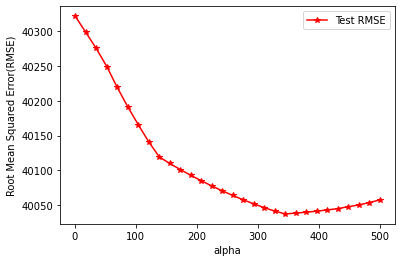

In [48]:
#** No need to fill in any command in this cell, but you need to execute this command.
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline

#line1, = plt.plot(alpha_, train_results, marker='o', color='b', label='Train RMSE')
line2, = plt.plot(alpha_, test_results, marker='*', color='r', label='Test RMSE')
plt.legend()
plt.ylabel('Root Mean Squared Error(RMSE)')
plt.xlabel('alpha')
plt.show()

**We will do decision tree regressor next**

In [49]:
# Define model to be decision tree regressor, no max_depth set here as so many features
model = DecisionTreeRegressor(random_state=0)

# train the model using training dataset
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [50]:
# Apply the trained tree model on the test set to perform prediction
y_pred = model.predict(X_test)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))


# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))


# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

Mean Squared Error: 1452721514.2260275
Root Mean Squared Error: 38114.58400961537
Mean Absolute Error: 24596.440639269407


In [51]:
#** No need to fill in any command in this cell, but you need to execute this command. 

# use export_graphviz to visualize the tree
dot_data = tree.export_graphviz(model, feature_names=features, filled = True, rounded=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render("houseprice_tree") 

'houseprice_tree.pdf'

Conclusion: Based on this round experiment, the Mean Squared Error, Root Mean Squared Error and Mean Absolute Error indicate that the performance of Lasso Regression > Linear Regression > Decision Tree Regressor

### 2nd Round Model Building : Use of Cross-Validation in Linear Regression

We aim to use cross validation to find optimal number of features for linear regression models, since 44 is still a large number for number of features

In [52]:
# k-fold CV
# here we tune based on r squared
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores 

array([0.7110878 , 0.85358773, 0.8667555 , 0.86290801, 0.88127122])

In [53]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.88353999, 0.8246989 , 0.89853619, 0.69469377, 0.87216121])

In [54]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-1.72259850e+09, -9.78754402e+08, -1.05438582e+09, -7.03419224e+08,
       -5.35160891e+08])

In [55]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 45))}]

# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:   12.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.123826,0.033806,0.004549,0.000677,1,{'n_features_to_select': 1},0.635333,0.569104,0.669326,0.589372,0.608596,0.614346,0.035119,44,0.610014,0.629567,0.602040,0.618995,0.615868,0.615297,0.009179
1,0.133655,0.068472,0.007215,0.002810,2,{'n_features_to_select': 2},0.695227,0.705176,0.750641,0.646359,0.731224,0.705725,0.035503,43,0.702704,0.729075,0.717847,0.737003,0.692221,0.715770,0.016477
2,0.128146,0.043495,0.005945,0.002920,3,{'n_features_to_select': 3},0.775912,0.725136,0.782550,0.653336,0.773853,0.742157,0.048897,42,0.753631,0.783942,0.762239,0.786499,0.753041,0.767870,0.014558
3,0.078142,0.013856,0.004141,0.001044,4,{'n_features_to_select': 4},0.819908,0.737520,0.819781,0.645709,0.810085,0.766601,0.067855,41,0.782637,0.805055,0.792274,0.811122,0.783493,0.794916,0.011434
4,0.075530,0.021510,0.004142,0.001737,5,{'n_features_to_select': 5},0.833576,0.771445,0.840897,0.652495,0.810512,0.781785,0.069028,40,0.791829,0.825690,0.804583,0.829970,0.802052,0.810825,0.014590
5,0.090502,0.025663,0.003864,0.001810,6,{'n_features_to_select': 6},0.843024,0.780917,0.842126,0.647881,0.807917,0.784373,0.072072,39,0.805308,0.833976,0.815225,0.841210,0.815066,0.822157,0.013303
6,0.088221,0.026008,0.003836,0.001272,7,{'n_features_to_select': 7},0.859947,0.787635,0.845970,0.647009,0.820184,0.792149,0.076636,38,0.812426,0.840930,0.822973,0.841761,0.824256,0.828469,0.011289
7,0.082850,0.031815,0.005617,0.002660,8,{'n_features_to_select': 8},0.863382,0.788502,0.852441,0.670795,0.840496,0.803123,0.070971,37,0.817500,0.847279,0.831819,0.849104,0.832584,0.835657,0.011574
8,0.079211,0.014548,0.003300,0.000777,9,{'n_features_to_select': 9},0.863519,0.796464,0.859740,0.662903,0.843541,0.805233,0.075060,36,0.817586,0.855412,0.837595,0.853969,0.836798,0.840272,0.013789
9,0.053751,0.001186,0.002708,0.000133,10,{'n_features_to_select': 10},0.859837,0.806403,0.870129,0.672884,0.843729,0.810597,0.072179,35,0.825912,0.857090,0.841438,0.858709,0.837024,0.844035,0.012411


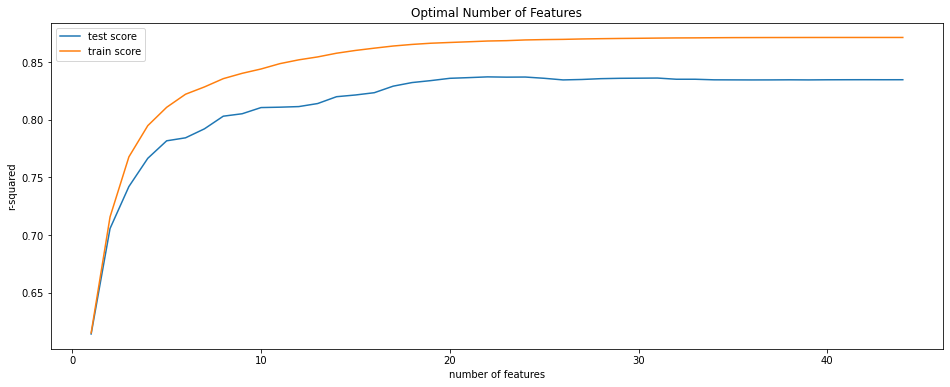

In [57]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

From the graph above, we can see in the beginning, r-squared increases significantly as the number of features increases; however, when the number of features reaches 25, the marginal effect (the speed of increasing) becomes smaller. We may try 20 features.

In [58]:
# using 25 features
n_features_optimal = 25

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R-Squared:",r2)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

R-Squared: 0.7529616589738823
Mean Squared Error: 1677141182.81603
Root Mean Squared Error: 40952.9142164026
Mean Absolute Error: 21072.12600015698


In [59]:
# using 44 features
n_features_optimal = 44

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R-Squared:",r2)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

R-Squared: 0.7605038801433166
Mean Squared Error: 1625937107.8508897
Root Mean Squared Error: 40322.910458582846
Mean Absolute Error: 20894.062544712404


We can see that cutting the number of features from 44 to 25 makes the R-Sqaured a little bit lower and the error a little bit larger, but not at an unacceptable level. 

If we only consider to achieve higher R-Squared and lower error, we will choose model with 44 features. However, in real life, for simplicity, we may choose the linear model of 25 features (or even fewer), since starting from 25, the marginal effect of each newly added feature may not be very significant, and it will add complexity to the model

### 3rd Round Model Building
In the 3rd round of model building, we will use:
* XGBoost tree of 1000 estimators with 44 selected features
* Random forest tree of 1000 estimators with 44 selected features

In [60]:
# The learning curve which is used to spot variance and bias problems
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("N (Training Set Sizes)")
    plt.ylabel("Mean Square Log Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        scoring=make_scorer(mean_squared_log_error), train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation error")

    plt.legend(loc="best")
    plt.grid()
    return plt

<module 'matplotlib.pyplot' from '/Users/kedaqi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

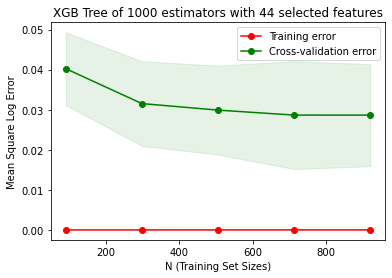

In [61]:
# Gradient boosting library
model = XGBRegressor(n_estimators=1000)
title = "XGB Tree of 1000 estimators with {} selected features".format(len(selected_features_map))
plot_learning_curve(model, title, X_train, y_train, cv=10, n_jobs=-1)

<module 'matplotlib.pyplot' from '/Users/kedaqi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

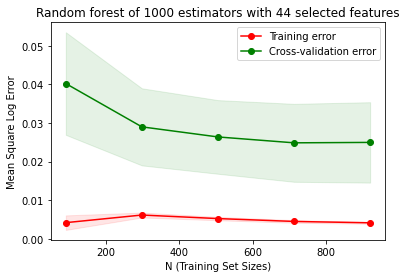

In [62]:
rf_r = RandomForestRegressor(n_estimators=1000, n_jobs=4)
title = "Random forest of 1000 estimators with {} selected features".format(len(selected_features_map))
plot_learning_curve(rf_r, title, X_train[selected_features_map], y_train, cv=10, n_jobs=-1)

Result evaluation

In [63]:
# XGBoost
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

Mean Squared Error: 859858494.476865
Root Mean Squared Error: 29323.343848832537
Mean Absolute Error: 18682.53437143265


In [64]:
# Random forest regressor
rf_r.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_r.predict(X_test)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

Mean Squared Error: 977474205.6668687
Root Mean Squared Error: 31264.583887633442
Mean Absolute Error: 17903.306876060018


### 4th Round Model Building
In the 4th round of model building, we will use:
* XGBoost-Recursive Feature Elimination algorithm (1000 estimators): We use RFE to cut the number of features to 20,15,10 and do XGBoost to do the prediction

* Random Forest-Recursive Feature Elimination algorithm (1000 estimators): We use RFE to cut the number of features to 20,15,10 and do random forest regressor to do the prediction


In [70]:
# XGBoost-Recursive Feature Elimination algorithm
# We use RFE to cut the number of features to 20 and do XGBoost to do the prediction

xg = XGBRegressor(n_estimators=1000)

rfe = RFE(xg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R-Squared:",r2)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

R-Squared: 0.8550117465691536
Mean Squared Error: 984324011.5822015
Root Mean Squared Error: 31373.938413629257
Mean Absolute Error: 18061.462655251144


In [73]:
# XGBoost-Recursive Feature Elimination algorithm
# We use RFE to cut the number of features to 15 and do XGBoost to do the prediction

xg = XGBRegressor(n_estimators=1000)

rfe = RFE(xg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R-Squared:",r2)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

R-Squared: 0.8693654497364997
Mean Squared Error: 886876843.6329641
Root Mean Squared Error: 29780.47755884657
Mean Absolute Error: 19883.863584474886


In [76]:
# XGBoost-Recursive Feature Elimination algorithm
# We use RFE to cut the number of features to 10 and do XGBoost to do the prediction

xg = XGBRegressor(n_estimators=1000)

rfe = RFE(xg, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R-Squared:",r2)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

R-Squared: 0.8502087087917002
Mean Squared Error: 1016931793.9439547
Root Mean Squared Error: 31889.368039269055
Mean Absolute Error: 21015.207521760844


In [71]:
# RF-RFE (Random Forest-Recursive Feature Elimination algorithm)
# We use RFE to cut the number of features to 20 and do random forest regressor to do the prediction

rf = RandomForestRegressor(n_estimators=1000)

rfe = RFE(rf, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R-Squared:",r2)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

R-Squared: 0.8568060473033579
Mean Squared Error: 972142519.2551746
Root Mean Squared Error: 31179.200106083135
Mean Absolute Error: 18065.226511089368


In [74]:
# RF-RFE (Random Forest-Recursive Feature Elimination algorithm)
# We use RFE to cut the number of features to 15 and do random forest regressor to do the prediction

rf = RandomForestRegressor(n_estimators=1000)

rfe = RFE(rf, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R-Squared:",r2)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

R-Squared: 0.8492241994791543
Mean Squared Error: 1023615619.2403771
Root Mean Squared Error: 31993.993486909025
Mean Absolute Error: 18458.639570790754


In [77]:
# RF-RFE (Random Forest-Recursive Feature Elimination algorithm)
# We use RFE to cut the number of features to 10 and do random forest regressor to do the prediction

rf = RandomForestRegressor(n_estimators=1000)

rfe = RFE(rf, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R-Squared:",r2)

# evaluate result 
# show MSE(mean sqaured error)
print("Mean Squared Error:",mean_squared_error(y_pred, y_test))

# show RMSE(root mean sqaured error)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred, y_test)))

# show MAE(mean absolute error)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_test))

R-Squared: 0.8439256614797561
Mean Squared Error: 1059587348.3679093
Root Mean Squared Error: 32551.30332825261
Mean Absolute Error: 19221.5906757556


### Final Step: Retrain decided Model with train_data and use for Predict Data submission

Based on our previous modelling, XGBoost and Random Forest Regressor perform the best

In terms of MSE, RMSE: XGBoost is better

In terms of MAE: Random Forest Regressor

Therefore, we will retrain the model with the whole dataset and make final prediction.

In [65]:
# XGBoost
model = XGBRegressor(n_estimators=1000)
model.fit(X[selected_features_map], y)
my_prediction = model.predict(predict_data_dummied[selected_features_map])

In [66]:
result_frame = {'Id': predict_data_dummied.index+1461, 'SalePrice': my_prediction}
result_df = pd.DataFrame(result_frame)
result_df.to_csv('./my_submission_XGBoost.csv', index=False)

In [67]:
# Random Forest Regressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(X[selected_features_map], y)
my_prediction = model.predict(predict_data_dummied[selected_features_map])

In [68]:
result_frame = {'Id': predict_data_dummied.index+1461, 'SalePrice': my_prediction}
result_df = pd.DataFrame(result_frame)
result_df.to_csv('./my_submission_RF.csv', index=False)

Our attempt using XGBoost reaches score of __0.15302__. 

Our attempt using Random Forest reaches score of __0.16244__. 

XGBoost is better in this case, since the error 0.15302 is smaller than 0.16244.